<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importation" data-toc-modified-id="Importation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importation</a></span></li><li><span><a href="#Moyenne-et-std-locales" data-toc-modified-id="Moyenne-et-std-locales-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Moyenne et std locales</a></span><ul class="toc-item"><li><span><a href="#Bases" data-toc-modified-id="Bases-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Bases</a></span></li><li><span><a href="#Mise-en-place" data-toc-modified-id="Mise-en-place-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Mise en place</a></span></li><li><span><a href="#Résultats" data-toc-modified-id="Résultats-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Résultats</a></span></li></ul></li><li><span><a href="#Transformation-de-Fourier" data-toc-modified-id="Transformation-de-Fourier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Transformation de Fourier</a></span><ul class="toc-item"><li><span><a href="#exemple" data-toc-modified-id="exemple-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>exemple</a></span></li><li><span><a href="#Test" data-toc-modified-id="Test-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Test</a></span></li></ul></li><li><span><a href="#pywt.threshold:-Removing-hight-frequency" data-toc-modified-id="pywt.threshold:-Removing-hight-frequency-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>pywt.threshold: Removing hight frequency</a></span><ul class="toc-item"><li><span><a href="#Résultats" data-toc-modified-id="Résultats-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Résultats</a></span></li><li><span><a href="#Détection-de-défaults-avec-le-résultat" data-toc-modified-id="Détection-de-défaults-avec-le-résultat-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Détection de défaults avec le résultat</a></span></li></ul></li><li><span><a href="#Isolation-Forest" data-toc-modified-id="Isolation-Forest-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Isolation Forest</a></span></li><li><span><a href="#pywt-+-Isolation-Forest" data-toc-modified-id="pywt-+-Isolation-Forest-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>pywt + Isolation Forest</a></span></li><li><span><a href="#TESTS" data-toc-modified-id="TESTS-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>TESTS</a></span></li></ul></div>

In [1]:
# PLOTLY, tracer graphe: https://plotly.com/python/line-charts/

# Importation

In [2]:
# importation du df_xls
import pandas as pd
import numpy as np
#df = pd.read_excel("rh000250_1117.xls", sheet_name="HR_Export")
df = pd.read_csv("cardio_vincent_3.csv")
df = df[["training time (min:sec)", "HR"]]

# importation du df_txt
#df=pd.read_table('Cardios/Cardios propres/VP/VP - Effort.txt',skiprows=6,header=None,names=['time','HR'])
#df.to_csv ('Cardios/Cardios propres/VP/VP - Effort.csv', index = None, header=True)

In [3]:
# Affichage du df
print("lignes:", len(df),"      val manquantes:", np.isnan(df.HR).sum())
# df.HR[4]='NaN'
df.head()

lignes: 2933       val manquantes: 10


,training time (min:sec),HR
0,0:00,99.0
1,0:01,98.0
2,0:02,99.0
3,0:03,101.0
4,0:04,102.0


In [4]:
# conversion du contenu d'un df_txt en float
#for col in df.columns:
#    df[col] = [x.replace(',', '.') for x in df[col]]
#    df[col] = df[col].astype(float)

# conversion du contenu d'un df_xls    
for col in df.columns:
    if col == "training time (min:sec)":
        df[col] = [60*x[:-3] + x[-2:] for x in df[col]]
        df[col] = df[col].astype(float)
    
    
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   training time (min:sec)  2933 non-null   float64
 1   HR                       2923 non-null   float64
dtypes: float64(2)
memory usage: 46.0 KB
None


In [5]:
# Affichage du df
print("lignes:", len(df),"      val manquantes:", np.isnan(df.HR).sum())
df.HR[4]='NaN'
df.head()

lignes: 2933       val manquantes: 10


,training time (min:sec),HR
0,0.0,99.0
1,1.0,98.0
2,2.0,99.0
3,3.0,101.0
4,4.0,NaN


# Moyenne et std locales

## Bases

In [6]:
def HR_mean(ante, post):
    ''' Moyenne sur ante+post+1 valeurs
        col[k] = moy(col[k-ante : k+post])
    '''
    mean_ante = [np.mean(df.HR[0:ante+post+1])]*ante
    mean = [np.mean(df.HR[k-ante:k+post+1]) for k in range(ante, len(df)-post)]
    mean_post = [mean[-1]]*post
    return mean_ante + mean + mean_post

df["HR_mean"] = HR_mean(2, 2)

In [7]:
def HR_std(ante, post):
    ''' Moyenne sur ante+post+1 valeurs
        col[k] = std(col[k-ante : k+post])
    '''
    std_ante = [np.std(df.HR[0:ante+post+1])]*ante
    std = [np.std(df.HR[k-ante:k+post+1]) for k in range(ante, len(df)-post)]
    std_post = [std[-1]]*post
    return std_ante + std + std_post

df["HR_std"] = HR_std(2, 2)

In [8]:
df['HR_mean-'] = df['HR_mean'] - df["HR_std"]
df['HR_mean+'] = df['HR_mean'] + df["HR_std"]

In [9]:
def ecart():
    return [0] + [df['HR'][i] - df['HR'][i-1] for i in range(1,len(df))]
    
df['HR_ecart'] = ecart()

## Mise en place

In [10]:
def change():
    l = df['HR']
    for i in range(5):
        if df['HR'][i] < df['HR_mean-'][i] or df['HR'][i]> df['HR_mean+'][i]:
            print("change",i)
            l[i] = df['HR_mean'][i]
        else: print("non change",i)
    return l
df['HR_change'] = change()

non change 0
change 1
non change 2
non change 3
non change 4


## Résultats

In [11]:
# Affichage du df
df = df.fillna(0) # à discuter
print("lignes:", len(df),"      val manquantes:", np.isnan(df.HR).sum())
df.head()

lignes: 2933       val manquantes: 0


,training time (min:sec),HR,HR_mean,HR_std,HR_mean-,HR_mean+,HR_ecart,HR_change
0,0.0,99.00,99.25,1.089725,98.160275,100.339725,0.0,99.00
1,1.0,99.25,99.25,1.089725,98.160275,100.339725,-1.0,99.25
2,2.0,99.00,99.25,1.089725,98.160275,100.339725,1.0,99.00
3,3.0,101.00,100.50,2.291288,98.208712,102.791288,2.0,101.00
4,4.0,0.00,102.50,2.692582,99.807418,105.192582,0.0,0.00


In [12]:
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from plotly.offline import iplot
fig = df.iloc[:, 1:].iplot(asFigure=True)
fig.show()

# Transformation de Fourier

<a href="https://courspython.com/fft-introduction.html">lien</a>

## exemple

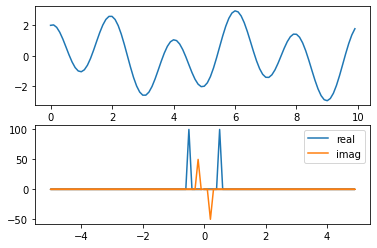

In [13]:
# A ETUDIER, series de Fourrier: https://courspython.com/fft-introduction.html
import numpy as np
import matplotlib.pyplot as plt

# definition du signal
dt = 0.1
T1 = 2
T2 = 5
t = np.arange(0, T1*T2, dt)
signal = 2*np.cos(2*np.pi/T1*t) + np.sin(2*np.pi/T2*t)

# affichage du signal
plt.subplot(211)
plt.plot(t, signal)

# calcul de la transformee de Fourier et des frequences
fourier = np.fft.fft(signal)
n = signal.size
freq = np.fft.fftfreq(n, d=dt)

# affichage de la transformee de Fourier
plt.subplot(212)
plt.plot(freq, fourier.real, label="real")
plt.plot(freq, fourier.imag, label="imag")
plt.legend()

plt.show()

## Test

C:\Users\Utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning:

signal prefered to be even in size, autoFixing it...



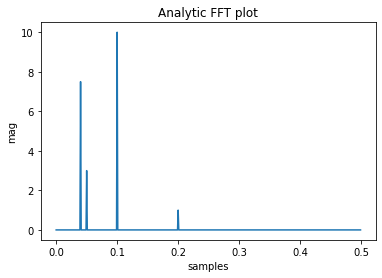

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import warnings


def fftPlot(sig, dt=None, plot=True):
    # here it's assumes analytic signal (real signal...)- so only half of the axis is required

    if dt is None:
        dt = 1
        t = np.arange(0, sig.shape[-1])
        xLabel = 'samples'
    else:
        t = np.arange(0, sig.shape[-1]) * dt
        xLabel = 'freq [Hz]'

    if sig.shape[0] % 2 != 0:
        warnings.warn("signal prefered to be even in size, autoFixing it...")
        t = t[0:-1]
        sig = sig[0:-1]

    sigFFT = np.fft.fft(sig) / t.shape[0]  # divided by size t for coherent magnitude

    freq = np.fft.fftfreq(t.shape[0], d=dt)

    # plot analytic signal - right half of freq axis needed only...
    firstNegInd = np.argmax(freq < 0)
    freqAxisPos = freq[0:firstNegInd]
    sigFFTPos = 2 * sigFFT[0:firstNegInd]  # *2 because of magnitude of analytic signal

    if plot:
        plt.figure()
        plt.plot(freqAxisPos, np.abs(sigFFTPos))
        plt.xlabel(xLabel)
        plt.ylabel('mag')
        plt.title('Analytic FFT plot')
        plt.show()

    return sigFFTPos, freqAxisPos


if __name__ == "__main__":
    dt = 1 / 1000

    # build a signal within nyquist - the result will be the positive FFT with actual magnitude
    f0 = 200  # [Hz]
    t = np.arange(0, 1 + dt, dt)
    sig = 1 * np.sin(2 * np.pi * f0 * t) + \
        10 * np.sin(2 * np.pi * f0 / 2 * t) + \
        3 * np.sin(2 * np.pi * f0 / 4 * t) +\
        7.5 * np.sin(2 * np.pi * f0 / 5 * t)
    fftPlot(sig)

In [15]:
#from scipy.fftpack import fft
 
#def get_fft_values(y_values, N, f_s):
#    f_values = np.linspace(0.0, f_s/2.0, N//2)
#    fft_values_ = fft(y_values)
#   fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
 #   return f_values, fft_values


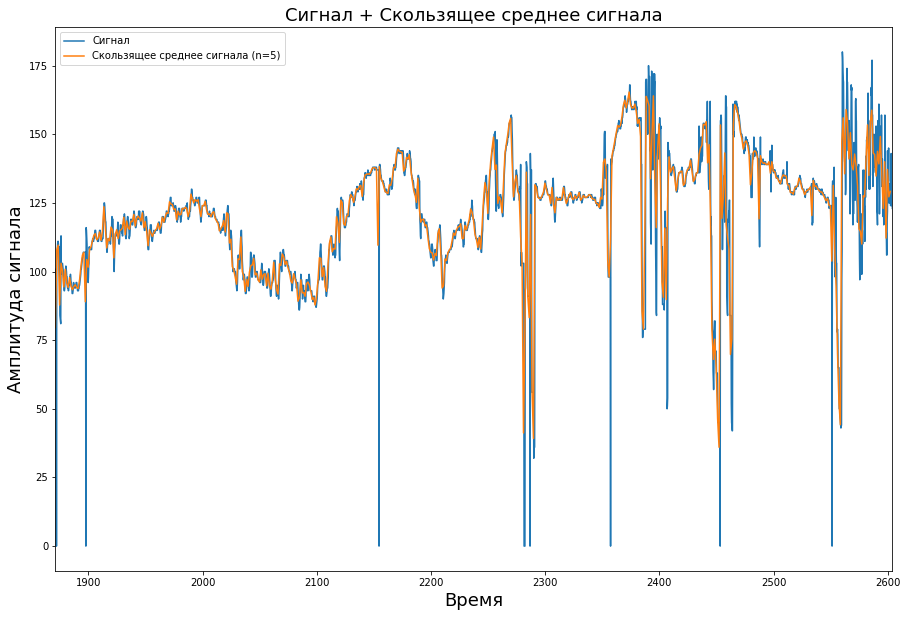

In [16]:
# https://sudonull.com/post/28178-Wavelet-analysis-Part-2
# https://github.com/taspinar/siml
from numpy import *
from scipy import *
import pandas as pd
from pylab import *
import pywt
def get_ave_values(xvalues, yvalues, n = 5):
    signal_length = len(xvalues)
    if signal_length % n == 0:
        padding_length = 0
    else:
        padding_length = n - signal_length//n % n
    xarr = array(xvalues)
    yarr = array(yvalues)
    xarr.resize(signal_length//n, n)
    yarr.resize(signal_length//n, n)
    xarr_reshaped = xarr.reshape((-1,n))
    yarr_reshaped = yarr.reshape((-1,n))
    x_ave = xarr_reshaped[:,0]
    y_ave = nanmean(yarr_reshaped, axis=1)
    return x_ave, y_ave
def plot_signal_plus_average(time, signal, average_over = 5):
    fig, ax = subplots(figsize=(15, 10))
    time_ave, signal_ave = get_ave_values(time, signal, average_over)
    ax.plot(time, signal, label='Сигнал')
    ax.plot(time_ave, signal_ave, label = 'Скользящее среднее сигнала (n={})'.format(5))
    ax.set_xlim([time[0], time[-1]])
    ax.set_ylabel('Амплитуда сигнала', fontsize=18)
    ax.set_title('Сигнал + Скользящее среднее сигнала', fontsize=18)
    ax.set_xlabel('Время', fontsize=18)
    ax.legend()
    show()     
df_nino = df
N = df_nino.shape[0]
t0=1871
dt=0.25
time = arange(0, N) * dt + t0
signal = df['HR_change'].values.squeeze()
scales = arange(1, 128)
plot_signal_plus_average(time, signal)


In [17]:
# https://glowingpython.blogspot.com/2011/08/how-to-plot-frequency-spectrum-with.html


# pywt.threshold: Removing hight frequency 

<a href="http://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/">lien</a>
<p> à creuser </p>

## Résultats

In [18]:
import pywt
import matplotlib.pyplot as plt
from ipywidgets import interact

signal = df.HR.fillna(100).values # Toutes les valeurs doivent exister
def lowpassfilter(signal, thresh = 0.63, wavelet="db4"):
    print(signal)
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal



@interact(t=(0.01,0.5,0.02))
def aff_DWT(t):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(signal, color="b", alpha=0.5, label='original signal')
    
    global rec # for tests next bloc
    rec = lowpassfilter(signal, thresh = t)
    ax.plot(rec, 'k', label='DWT smoothing}', linewidth=2)

    ax.legend()
    ax.set_title('Removing High Frequency Noise with DWT', fontsize=18)
    ax.set_ylabel('Signal Amplitude', fontsize=16)
    ax.set_xlabel('Sample No', fontsize=16)
    plt.show()
    
    
    
    global essais # for pywt + Isolation Forest (part 6)
    essais = [i-j for i,j in zip(rec,signal)]

interactive(children=(FloatSlider(value=0.25, description='t', max=0.5, min=0.01, step=0.02), Output()), _dom_…

## Détection de défaults avec le résultat

In [19]:
# test rec variations
rec_v = [0] + [rec[i] - rec[i-1] for i in range(1,len(rec))]
fig = pd.Series(rec_v).iplot(asFigure=True)
fig.show()

In [20]:
# test rec variations
rec_v = [0] + [rec[i] - rec[i-1] for i in range(1,len(rec))]
#fig = pd.Series(rec_v).iplot(asFigure=True)
#fig.show()
'''
    => problème si la variation de rec_v non comprise entre -1,5 et 1,5
    à creuser
'''
rec_v_valide = list(map(lambda x : int(-1.5<x<1.5),rec_v))
fig = pd.Series(rec_v_valide).iplot(asFigure=True)
fig.show()

In [21]:
def test2(ante, post):
    ''' is only 1 sur ante+post+1 valeurs
        col[k] = prod(col[k-ante : k+post])
    '''
    prod_ante = rec_v_valide[0:ante]
    prod = [np.prod(rec_v_valide[k-ante:k+post+1]) for k in range(ante, len(df)-post)]
    prod_post = rec_v_valide[len(df)-post:]
    return prod_ante + prod + prod_post
rec_v_valide = test2(7, 7)
fig = pd.Series(rec_v_valide).iplot(asFigure=True)
fig.show()
"""
    => zone non valide obtenue (étudier les modifications à apporter dans cette zone) 
"""

'\n    => zone non valide obtenue (étudier les modifications à apporter dans cette zone) \n'

# Isolation Forest

In [22]:
'''
    Prérequis: dataframe ayant une colonne numérique sans NaN
'''
data = df["HR"].dropna() # => décalage de 1s
data = np.reshape(list(data),(-1,1))

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt 
from ipywidgets import interact

scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)


@interact(x=(0,1,0.1))
def f(x):
    # train isolation forest (Les Nan doivent être comblées)
    outliers_fraction = x
    model =  IsolationForest(contamination=outliers_fraction)
    model.fit(data) 
    data['anomaly'] = pd.Series(model.predict(data))

    anomaly = data.loc[data['anomaly'] == -1]

    #anomaly[0] = scaler.inverse_transform(anomaly[0])
    #data[0] = scaler.inverse_transform(data[0])
    
    # visualization
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(data[0], color='blue', label = 'Normal')
    ax.scatter(anomaly.index,anomaly[0], color='red', label = 'Anomaly')
    plt.legend()
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='x', max=1.0), Output()), _dom_classes=('widget-inter…

In [23]:
#data.head(10)

# pywt + Isolation Forest

In [24]:


data = pd.Series(essais).dropna() # => décalage de 1s
data = np.reshape(list(data),(-1,1))

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt 
from ipywidgets import interact

scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)


@interact(x=(0,1,0.1))
def f(x):
    # train isolation forest (Les Nan doivent être comblées)
    outliers_fraction = x
    model =  IsolationForest(contamination=outliers_fraction)
    model.fit(data) 
    data['anomaly'] = pd.Series(model.predict(data))

    anomaly = data.loc[data['anomaly'] == -1]

    anomaly[0] = scaler.inverse_transform(anomaly[0])
    data[0] = scaler.inverse_transform(data[0])
    
    # visualization
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(data[0], color='blue', label = 'Normal')
    ax.scatter(anomaly.index,anomaly[0], color='red', label = 'Anomaly')
    plt.legend()
    plt.show()


interactive(children=(FloatSlider(value=0.0, description='x', max=1.0), Output()), _dom_classes=('widget-inter…

# TESTS 

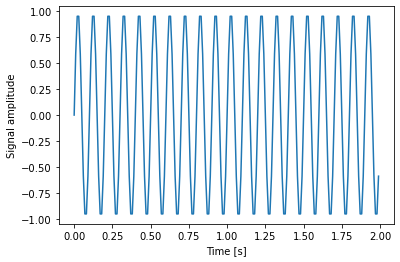

In [25]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

C:\Users\Utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



(-5.0, 110.0)

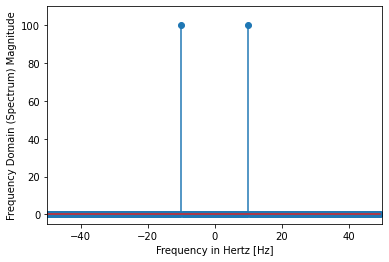

In [26]:
from scipy import fftpack

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)

In [30]:
# https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html
from scipy.signal import butter, lfilter
import ipywidgets
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

def f(fs, lowcut, highcut):
    try:
        # Filter a noisy signal.
        T = len(x)*1  # delai de 1s entre 2 mesures
        nsamples = len(x)
        t = np.linspace(0, T, nsamples, endpoint=False)
        
        df_graph=pd.DataFrame()
        df_graph['Noisy signal'] = df['HR_mean']
        df_graph['Filtered signal'] = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
        
        fig = df_graph.iplot(asFigure=True, title="Butterworth Bandpass",
                             labels=dict(index="time", value="money", variable="option"))
        fig.show()
    except:
        print("Paramètres non valides")
    print("fs =",fs," , lowcut =", lowcut, " , hightcut =",highcut)

    
x = df.HR_mean 
# Sample rate and desired cutoff frequencies (in Hz).
fs = ipywidgets.IntSlider(value=5000, min=1000, max=10000, step=500,description='fs:',readout=False)
lowcut = ipywidgets.IntSlider(value=500, min=100, max=1000, step=100,description='lowcut:',readout=False)
highcut = ipywidgets.IntSlider(value=1300, min=50, max=2000, step=50,description='hightcut:',readout=False)
ui = ipywidgets.HBox([fs, lowcut, highcut])
out = ipywidgets.interactive_output(f, {'fs': fs, 'lowcut': lowcut, 'highcut': highcut})
display(ui, out)

Output()